# **1. hr 데이터셋 살펴보기**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hr_df = pd.read_csv('/content/drive/MyDrive/파이썬AI프로젝트202307/4_머신러닝과 딥러닝/Data/hr.csv')
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


* employee_id: 임의의 직원 아이디
* department: 부서
* region: 지역
* education: 학력
* gender: 성별
* recruitment_channel: 채용 방법
* no_of_trainings: 트레이닝 받은 횟수
* age: 나이
* previous_year_rating: 이전 년도 고과 점수
* length_of_service: 근속 년수
* awards_won: 수상 경력
* avg_training_score: 평균 고과 점수
* is_promoted: 승진 여부

In [4]:
hr_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

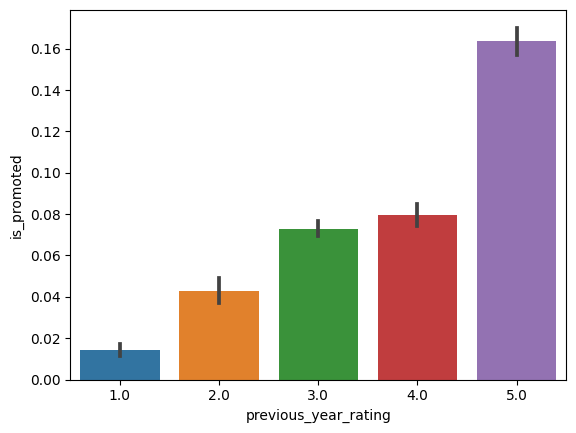

In [5]:
# 그래프를 그려서 각 독립변수와 종속변수의 관계성을 한 번 보자.
sns.barplot(x='previous_year_rating', y = 'is_promoted', data=hr_df)

<Axes: xlabel='avg_training_score', ylabel='is_promoted'>

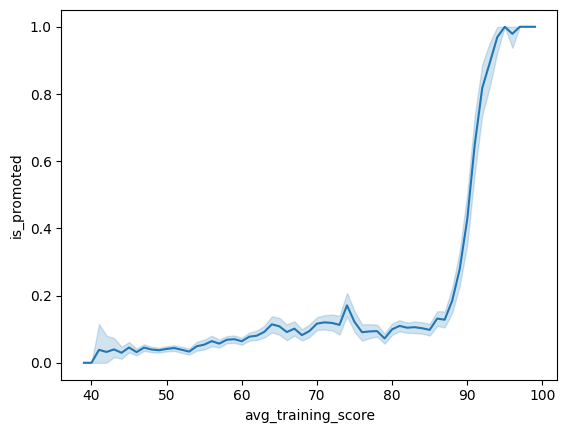

In [6]:
sns.lineplot(x='avg_training_score', y = 'is_promoted', data=hr_df)

<Axes: xlabel='recruitment_channel', ylabel='is_promoted'>

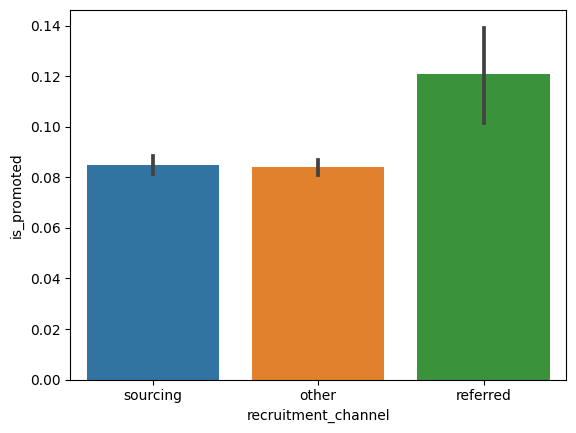

In [7]:
sns.barplot(x='recruitment_channel', y = 'is_promoted', data=hr_df)

In [8]:
hr_df['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

<Axes: xlabel='gender', ylabel='is_promoted'>

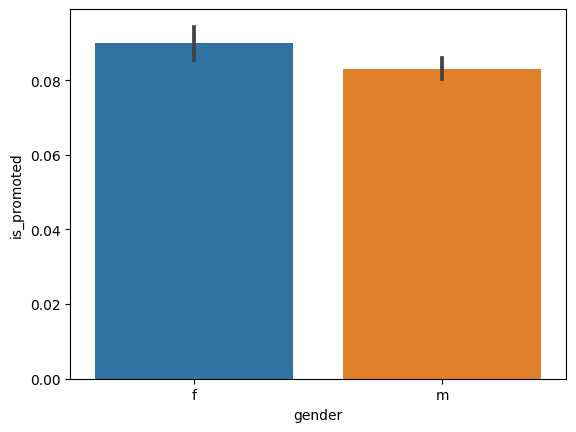

In [9]:
sns.barplot(x='gender', y = 'is_promoted', data=hr_df)

In [10]:
hr_df['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Analytics'),
  Text(4, 0, 'R&D'),
  Text(5, 0, 'Procurement'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'HR'),
  Text(8, 0, 'Legal')])

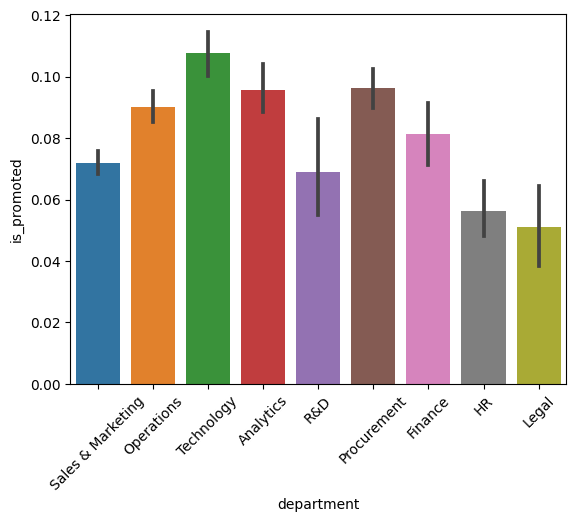

In [12]:
# 승진여부를 결정한다고 보기에는 조금 애매하다.
sns.barplot(x='department', y='is_promoted', data=hr_df)
plt.xticks(rotation = 45)

In [13]:
# 결측치 확인!
hr_df.isna().mean()

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [14]:
# 학력
# 압도적으로 높은 값이 없기에 최빈값은 살짝 비추
# unknown 값을 추가하는 방식으로도 결측치를 처리할 수 있다.
hr_df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [15]:
# 이전 년도 고과 점수
# 시각화를 해봤을 때 점수는 승진에 예민할 수 있을 것으로 판단!
# 채워넣기 보다는 삭제하는 방식으로 결측치 처리!
# 삭제하는게 정답이 아닐 수 있다.
hr_df = hr_df.dropna()

In [16]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  awards_won?           48660 non-null  int64  
 11  avg_training_score    48660 non-null  int64  
 12  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [17]:
# 원 핫 인코딩 진행!
for i in ['department', 'region', 'education', 'gender', 'recruitment_channel']:
  print(i, hr_df[i].nunique())

department 9
region 34
education 3
gender 2
recruitment_channel 3


In [18]:
hr_df = pd.get_dummies(hr_df, columns = ['department', 'region', 'education', 'gender', 'recruitment_channel'])
hr_df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,0,49,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,50,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,73,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [19]:
pd.set_option('display.max_columns', 60)

In [20]:
hr_df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(hr_df.drop('is_promoted', axis = 1), hr_df['is_promoted'], test_size = 0.2, random_state = 10)

# **2. 로지스틱 회귀(Logistic Regression)**
- [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
- 둘 중의 하나를 결정하는 문제(이진 분류)를 풀기 위한 대표적인 알고리즘
- 입력 데이터와 가중치의 선형 조합으로 선형 방정식을 만듦 -> 선형 방정식의 결과를 0과 1 사이의 확률값으로 변환(시그모이드 함수)
- 3개 이상의 클래스에 대한 판별을 할 수 있음
  - OvR(One-vs-Rest) : 각 클래스마다 하나의 이진 분류기를 만들고, 해당 클래스를 기준으로 그 클래스와 나머지 모든 클래스를 구분하는 이진 분류를 수행 -> 가장 높은 확률을 가진 클래스를 선택
  - OvO(One-vs-One) : 클래스 개수가 N인 경우 N(N-1)/2개의 이진 분류기를 만듦 -> 각 이진 분류기는 두 개의 클래스만 구분하는데, 해당 클래스와 나머지 클래스 간에 이진 분류를 수행 -> 입력 데이터를 각 이진 분류기에 넣어 가장 많이 선택된 클래스를 최종 선택

  > 대부분 OvR 전략을 선호. 클래스 간의 구분이 명확하지 않거나 데이터가 한쪽으로 치우친 경우 OvO를 고려

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
pred = lr.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
accuracy_score(y_test, pred)

0.9114262227702425

In [29]:
# 예측 정확도가 좋은 것 같지만
# 타겟값의 분포가 한쪽으로 치우쳐져 있기 때문에 의미가 없을 수 있다.
# 아리까리 하면 다 승진 못했다고 해버리더라도 예측 정확도가 높게 나올거기 때문!

# 이런 경우엔 accuracy_score 를 가지고 확인하는 건 좋지 않다.
# confusion_matrix 를 대신 사용!
# 데이터가 5대5면 accuracy_score 도 확인해볼만 하다.
hr_df['is_promoted'].value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

# **3. 혼돈 행렬(Confusion matrix)**
- 정밀도와 재현율(민감도)을 활용하는 평가용 지수

```
TN(8869)    FP(0)
FN(862)     TP(1)
```
- TN : 승진하지 못했는데, 승진하지 못했다고 예측
- FN : 승진하지 못했는데, 승진했다고 예측
- FP : 승진했는데, 승진하지 못했다고 예측
- TP : 승진했는데, 승진했다고 예측

In [34]:
confusion_matrix(y_test, pred)

array([[8869,    0],
       [ 862,    1]])

### 3-1. 정밀도(Precision)
- TP / (TP+FP)
- 무조건 양성으로 판단해서 계산하는 방법
- 실제 1인 것 중에 얼마 만큼을 제대로 맞췄는가?

### 3-2. 재현율(recall)
- TP / (TP+FN)
- 정확하게 감지한 양성 샘플의 비율
- 1이라고 예측한 것 중, 얼마 만큼을 제대로 맞췄는가?
- 민감도 또는 TPR(True Positive Rate)라고도 부름

### f1 score
- 정밀도와 재현율의 조화평균을 나타내는 지표
$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

```
정밀도   재현율   산술평균   조화평균
0.4      0.6      0.5        0.48
0.3      0.7      0.5        0.42
0.5      0.5      0.5        0.5
```

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [38]:
precision_score(y_test,pred)

1.0

In [40]:
recall_score(y_test, pred)

0.0011587485515643105

In [41]:
f1_score(y_test, pred)

0.0023148148148148147

In [47]:
# feature 들의 각 기울기 값
# 최적의 웨이트값을 만들어놓았다.
lr.coef_
# print(len(lr.coef_[0]))

array([[-5.42682567e-06, -2.11566320e-01, -1.24739314e-01,
         4.04217840e-01,  8.39462548e-02,  1.19382822e-01,
         1.24469097e-02, -4.53116409e-02, -1.59556720e-02,
        -1.69079211e-02, -1.06814883e-02,  3.10169499e-02,
         3.47912379e-03, -1.69516987e-02, -1.37996914e-02,
        -1.51941604e-02, -2.88706914e-03, -2.41993427e-03,
        -1.84270273e-02, -6.87835341e-03, -2.43612077e-03,
        -5.00401302e-03, -7.32654108e-03, -7.67662052e-03,
         7.71412885e-03, -3.21353065e-04, -6.68708228e-03,
         2.55409975e-02, -1.02529819e-02, -7.25376472e-03,
         9.23097034e-03,  9.63606751e-03, -9.39043583e-03,
         5.16728257e-03, -2.15726175e-02, -1.16101632e-02,
         9.39154969e-03, -1.82813463e-02,  1.50261133e-03,
        -1.97860883e-03, -2.28665036e-02, -1.35441186e-02,
        -5.26900930e-03, -6.03421587e-03,  3.29129457e-02,
        -1.48312957e-02, -1.18516648e-02,  2.54568502e-02,
        -2.39518611e-03, -9.66357577e-03, -2.00440936e-0

In [46]:
X_train.shape

(38928, 58)

In [50]:
# 독립변수의 수를 줄여서 학습을 한다면, coef_ 도 줄어들까?
TempX = hr_df[['previous_year_rating', 'avg_training_score', 'recruitment_channel_sourcing']]
tempY = hr_df['is_promoted']

In [51]:
temp_lr = LogisticRegression()

In [53]:
temp_lr.fit(TempX, tempY)

LogisticRegression()

In [54]:
temp_df = pd.DataFrame({'previous_year_rating' : [5.0, 3.0, 4.0], 'avg_training_score' : [50, 60, 90], 'recruitment_channel_sourcing' : [1, 1, 1]})

In [55]:
temp_df

,previous_year_rating,avg_training_score,recruitment_channel_sourcing
0,5.0,50,1
1,3.0,60,1
2,4.0,90,1


In [56]:
pred = temp_lr.predict(temp_df)

In [58]:
pred

array([0, 0, 0])

In [59]:
temp_lr.coef_

array([[0.51251162, 0.04566409, 0.02224347]])

In [60]:
# 절편
temp_lr.intercept_

# 결국 우리가 만든 식은
# 0.51251162x1 + 0.04566409x2 + 0.02224347x3 + (-7.29586757)

array([-7.29586757])

In [61]:
# proba 값으로 확률을 알 수 있다.

proba = temp_lr.predict_proba(temp_df)
proba

array([[0.91892736, 0.08107264],
       [0.95240415, 0.04759585],
       [0.75283864, 0.24716136]])

In [65]:
proba = temp_lr.predict_proba(temp_df)[:, 1]

In [67]:
proba

array([0.08107264, 0.04759585, 0.24716136])

In [68]:
# 임계값 변경
threshold = 0.2
pred = (proba > threshold).astype(int)

In [69]:
pred

array([0, 0, 1])

# **4. 교차 검증(Cross Validation)**
- train_test_split에서 발생하는 데이터의 섞임에 따라 성능이 좌우되는 문제를 해결하기 위한 기술
- K-Fold 교차 검증을 가장 많이 사용

In [70]:
from sklearn.model_selection import KFold

In [71]:
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [72]:
hr_df

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,2,31,1.0,2,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
54803,3030,1,48,3.0,17,0,78,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
54804,74592,1,37,2.0,6,0,56,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
54805,13918,1,27,5.0,3,0,79,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [74]:
for train_index, test_index in kf.split(range(len(hr_df))):
  print(train_index, test_index)
  print(len(train_index), len(test_index))

[ 9732  9733  9734 ... 48657 48658 48659] [   0    1    2 ... 9729 9730 9731]
38928 9732
[    0     1     2 ... 48657 48658 48659] [ 9732  9733  9734 ... 19461 19462 19463]
38928 9732
[    0     1     2 ... 48657 48658 48659] [19464 19465 19466 ... 29193 29194 29195]
38928 9732
[    0     1     2 ... 48657 48658 48659] [29196 29197 29198 ... 38925 38926 38927]
38928 9732
[    0     1     2 ... 38925 38926 38927] [38928 38929 38930 ... 48657 48658 48659]
38928 9732


In [75]:
kf = KFold(n_splits = 5, random_state = 2023, shuffle = True)
kf

KFold(n_splits=5, random_state=2023, shuffle=True)

In [76]:
for train_index, test_index in kf.split(range(len(hr_df))):
  print(train_index, test_index)
  print(len(train_index), len(test_index))

[    1     2     3 ... 48656 48658 48659] [    0     7    13 ... 48634 48645 48657]
38928 9732
[    0     1     3 ... 48656 48657 48659] [    2    12    16 ... 48642 48644 48658]
38928 9732
[    0     1     2 ... 48657 48658 48659] [    5     6    17 ... 48652 48653 48655]
38928 9732
[    0     1     2 ... 48657 48658 48659] [    4     8    10 ... 48650 48654 48656]
38928 9732
[    0     2     4 ... 48656 48657 48658] [    1     3     9 ... 48648 48649 48659]
38928 9732


In [77]:
# 각 모델에서 나온 accuracy_score 를 담아줄 것이다.
acc_list = []

for train_index, test_index in kf.split(range(len(hr_df))):
  X = hr_df.drop('is_promoted', axis = 1)
  y = hr_df['is_promoted']

  X_train = X.iloc[train_index]
  X_test = X.iloc[test_index]
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]

  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  pred = lr.predict(X_test)
  acc_list.append(accuracy_score(y_test, pred))

In [78]:
acc_list

[0.9169749280723387,
 0.9110152075626798,
 0.9126592683929305,
 0.913481298808056,
 0.9110152075626798]

In [80]:
np.array(acc_list).mean()

0.9130291820797372